####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)}) # Set figure size
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image


# Import Data


In [36]:
df = pd.read_csv('flight_delays_train.csv')


# Read Data

In [37]:
df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [38]:
df.shape

(100000, 9)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [39]:
# Checking for any Missing Values
df.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [40]:
# Checking for Duplicates
df.duplicated().sum()

0

In [41]:
# Checking the data types
df.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object

In [42]:
#Checking for uniques values
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1300
UniqueCarrier          22
Origin                289
Dest                  289
Distance             1310
dep_delayed_15min       2
dtype: int64

In [43]:
# Checking statistics of data set
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


1. **DepTime (Departure Time):**
   - The "DepTime" column represents the departure time of flights.
   - The dataset contains 100,000 observations for this column.
   - The mean (average) departure time is approximately 1,341 (in military time, so 1:41 PM).
   - The standard deviation (std) is approximately 476, indicating the spread or variability of departure times.
   - The minimum departure time is 1 (which could be 12:01 AM).
   - The 25th percentile (Q1) is 931 (around 9:31 AM).
   - The median (50th percentile) departure time is 1,330 (around 1:30 PM).
   - The 75th percentile (Q3) is 1,733 (around 5:33 PM).
   - The maximum departure time is 2,534 (which could be 11:14 PM).

2. **Distance:**
   - The "Distance" column represents the distance (in miles) of flights.
   - Again, there are 100,000 observations for this column.
   - The mean distance is approximately 729 miles.
   - The standard deviation is around 574 miles.
   - The minimum distance is 30 miles.
   - The 25th percentile distance is 317 miles.
   - The median distance is 575 miles.
   - The 75th percentile distance is 957 miles.
   - The maximum distance is 4,962 miles.

In summary, this dataset appears to contain information about flight departure times and distances. The departure times range from early morning to late evening, and the distances covered by the flights vary widely. If you have any specific questions or need further analysis, feel free to ask! 😊

# EDA

# Numeric Data Analysis

In [44]:
df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


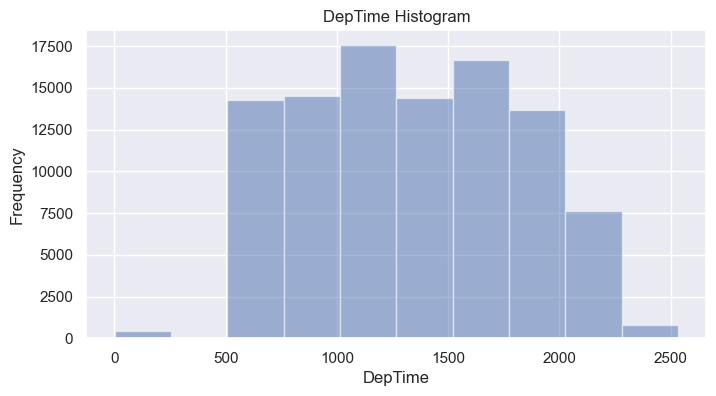

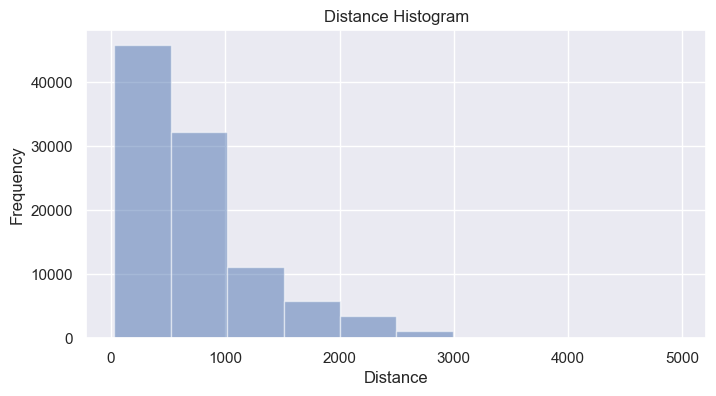

In [45]:
# Filter out numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Plot histograms for each numeric feature
for col in numeric_columns:
    df[col].plot.hist(alpha=0.5, bins=10, figsize=(8, 4), title=f"{col} Histogram")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show()


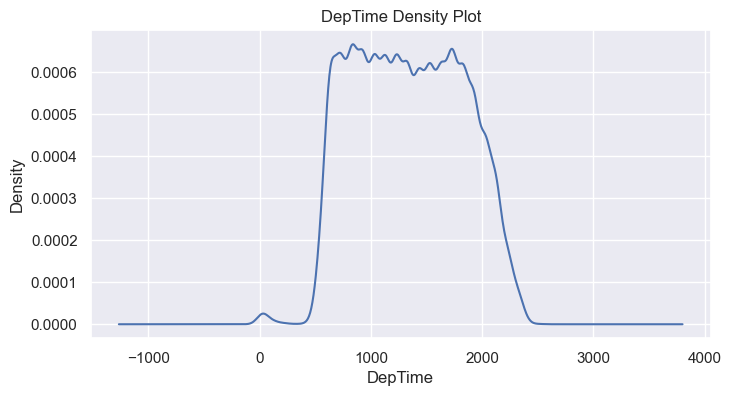

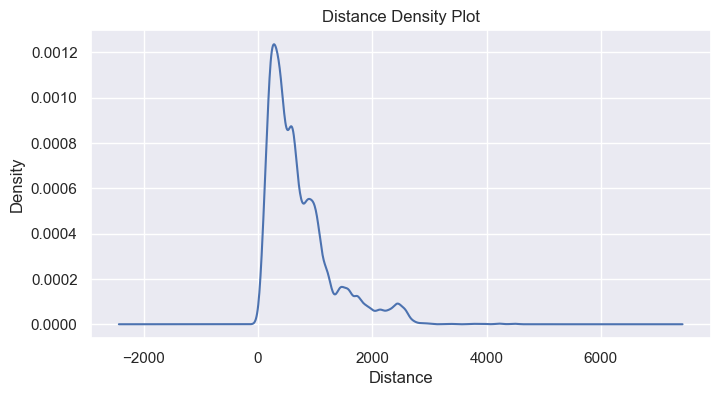

In [46]:
# Plot density plots (Kernel Density Estimation)
for col in numeric_columns:
    df[col].plot.density(figsize=(8, 4), title=f"{col} Density Plot")
    plt.xlabel(f"{col}")
    plt.ylabel("Density")
    plt.show()

# Categorical Data Analysis

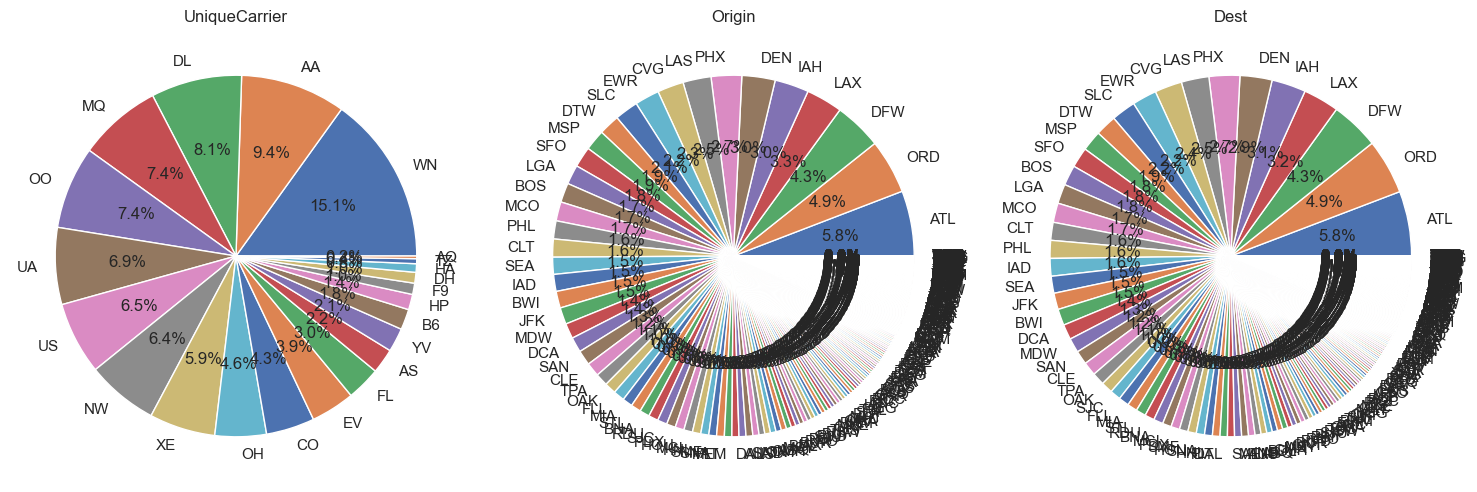

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
categorical_columns = ['UniqueCarrier', 'Origin', 'Dest']

# Create subplots for each column
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', title=col)
    axes[i].set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()





1. **Carrier Distribution**:
   - Southwest Airlines (WN) holds a significant share, accounting for approximately 15.1% of the flights.
   - American Airlines (AA) remains dominant with around 9.4% of the flights.

2. **Origin and Destination Hubs**:
   - Atlanta International Airport (ATL) serves as both the most common origin and destination, representing approximately 5.8% of the flights.
   - This reinforces ATL's status as a major hub connecting various routes.

3. **Traffic Patterns**:
   - The percentages associated with each segment provide a clearer picture of the traffic volume handled by carriers and airports.
   - ATL's high percentage suggests heavy air traffic, making it a critical hub for both domestic and international flights.



# Data Preprocessing


In [48]:
df2 = df.copy()

In [49]:
# Perfomimg a couple of edits to the data frame
import mmh3
import calendar


# Remove the 'c-' prefix from Month, DayofMonth, and DayOfWeek
df2['Month'] = df2['Month'].str.replace('c-', '')
df2['DayofMonth'] = df2['DayofMonth'].str.replace('c-', '')
df2['DayOfWeek'] = df2['DayOfWeek'].str.replace('c-', '')
# Create the CombinedDate column without the hyphen
df2['CombinedDate'] = df2.apply(lambda row: f"{int(row['Month'])}{int(row['DayofMonth']):02d}", axis=1)


# Select the categorical columns for hashing
categorical_columns = ['UniqueCarrier', 'Origin', 'Dest']
# Hash each row in the categorical columns using 64-bit mmh3
for col in categorical_columns:
    df2[f'{col}_hash'] = df2[col].apply(lambda x: mmh3.hash64(x)[0])  # Use the first value from the tuple
# dropping the hashed features
df2.drop(columns=['UniqueCarrier', 'Origin', 'Dest'], inplace=True)


# Edditing the target column
df2['delayed'] = df['dep_delayed_15min'].replace({'N': 0, 'Y': 1})
df2.drop(columns=['dep_delayed_15min'], inplace=True)


# converting dtype object to dtype int
for col in ['Month', 'DayofMonth', 'DayOfWeek', 'CombinedDate']:
    df2[col] = pd.to_numeric(df2[col], errors='coerce').astype('Int64')



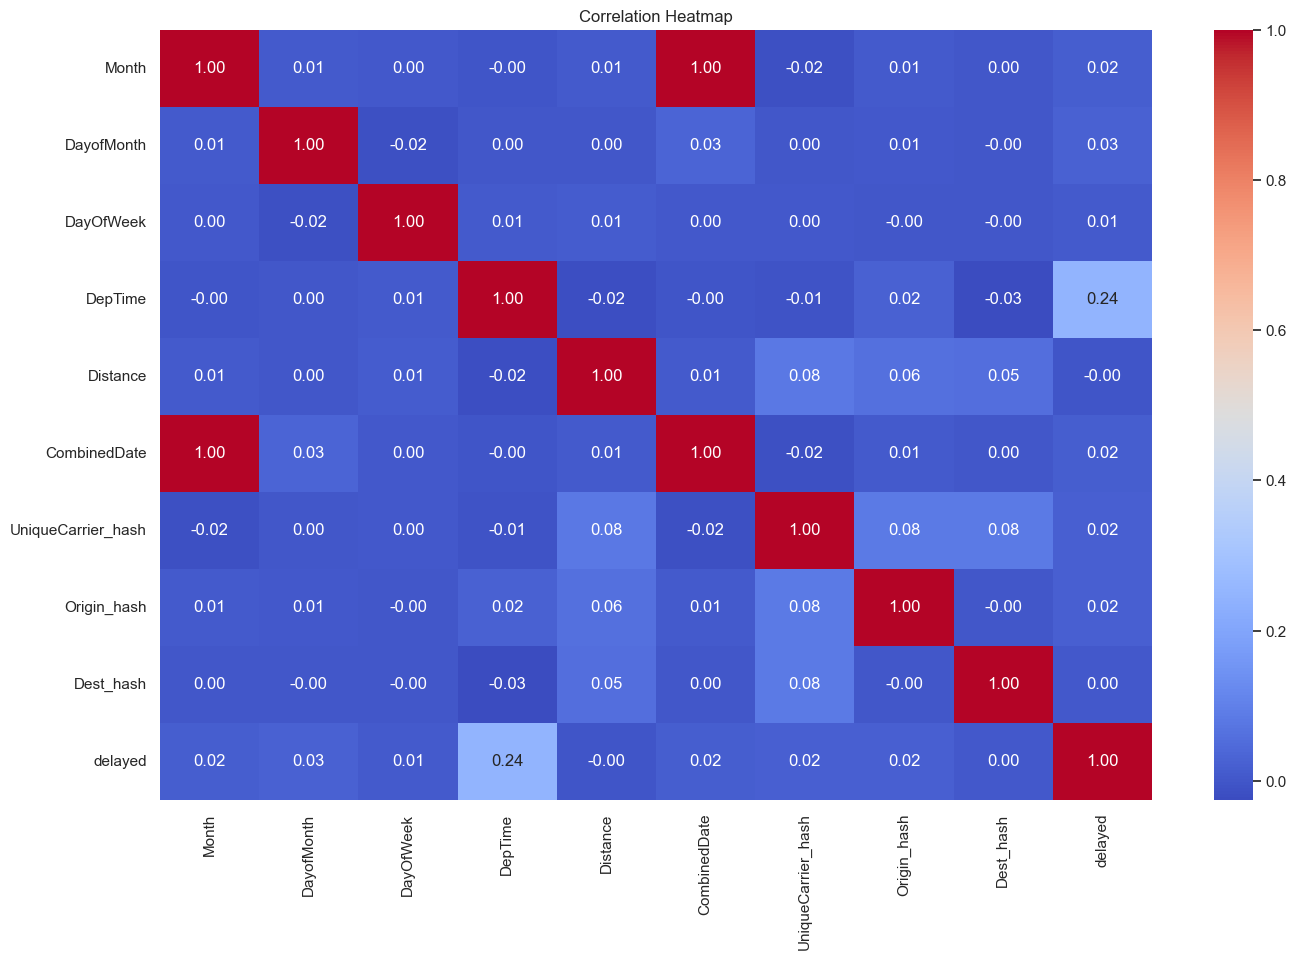

In [50]:
# Create a correlation heatmap using Seaborn
corr_matrix=df2.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [51]:
# Feature Engineering
from sklearn.preprocessing import SplineTransformer
df2['Dep_Dist']=df2['DepTime']*df2['Distance']
df2['DDC']=df2['Dep_Dist']/df2['CombinedDate']
df2['DCD']=df2['DayOfWeek']*df2['CombinedDate']/df2['Dep_Dist']
df2['Dist_Fact']=df2['Origin_hash']-df2['Dest_hash']
# Apply sine and cosine functions
df2['sin_Month'] = np.sin(np.radians(df2['Month']))
df2['sin_DayofMonth'] = np.sin(np.radians(df2['DayofMonth']))
df2['sin_DayOfWeek'] = np.sin(np.radians(df2['DayOfWeek']))
df2['cos_DayOfWeek'] = np.cos(np.radians(df2['DayOfWeek']))
df2['sin_DepTime'] = np.sin(np.radians(df2['DepTime']))
df2['cos_DepTime'] = np.cos(np.radians(df2['DepTime']))
df2['sin_CombinedDate'] = np.sin(np.radians(df2['CombinedDate']))
df2['cos_CombinedDate'] = np.cos(np.radians(df2['CombinedDate']))


In [52]:
#Feature Importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your feature matrix and 'y' is the target
y = df2['delayed']
X = df2.drop(columns=['delayed'])  # Remove inplace=True

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Get feature importances (using "gain")
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to organize the results
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance (descending order)
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print feature importance along with ratings
for idx, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


DepTime: 0.3137
CombinedDate: 0.0596
Dep_Dist: 0.0577
cos_CombinedDate: 0.0528
sin_CombinedDate: 0.0527
UniqueCarrier_hash: 0.0504
DayOfWeek: 0.0504
Distance: 0.0494
Origin_hash: 0.0485
Dest_hash: 0.0415
DayofMonth: 0.0387
sin_DepTime: 0.0373
cos_DepTime: 0.0346
DCD: 0.0314
DDC: 0.0310
Dist_Fact: 0.0280
Month: 0.0222
sin_DayOfWeek: 0.0000
cos_DayOfWeek: 0.0000
sin_DayofMonth: 0.0000
sin_Month: 0.0000


In [53]:
# Plot density plots (Kernel Density Estimation) for log transformation
cols=['Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'Distance',
 'CombinedDate',
 'UniqueCarrier_hash',
 'Origin_hash',
 'Dest_hash',
 'Dep_Dist',
 'DDC',
 'DCD',
 'Dist_Fact',
 'sin_Month',
 'sin_DayofMonth',
 'sin_DayOfWeek',
 'cos_DayOfWeek',
 'sin_DepTime',
 'cos_DepTime',
 'sin_CombinedDate',
 'cos_CombinedDate']
#for col in cols:
#    df2[col].plot.density(figsize=(8, 4), title=f"{col} Density Plot")
#    plt.xlabel(f"{col}")
#    plt.ylabel("Density")
#    plt.show()

In [54]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
cols2=['Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'Distance',
 'CombinedDate',
 'Dep_Dist',
 'DDC',
 'DCD',
 'sin_Month',
 'sin_DayofMonth',
 'sin_DayOfWeek',
 'cos_DayOfWeek'] #features that  are skewed

# we perform a log transformation of skewed features before perfoming scalling
X2=X[cols2]
X_log = np.log(X2 + 1)  # Apply log transform
# Combine the non-transformed features with the transformed features 
X3=X.drop(columns=cols2, inplace=True)
X4 = pd.concat([X_log, X3], axis=1)

# Scalling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X4), columns=X4.columns)
df_scaled.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,Distance,CombinedDate,Dep_Dist,DDC,DCD,sin_Month,sin_DayofMonth,sin_DayOfWeek,cos_DayOfWeek
0,0.558760,0.665188,1.261404,0.990076,0.372388,0.572372,0.831519,0.311397,-0.084624,0.452223,0.649013,1.508096,-1.808034
1,-0.505082,0.600408,-0.260966,0.493755,0.539272,-0.414361,0.727425,0.831514,-0.204393,-0.729006,0.545692,-0.464598,0.650451
2,0.749454,-2.109327,0.629563,0.304500,-0.350121,0.710968,-0.153952,-0.557897,0.053369,0.734773,-1.671879,0.539029,-0.332643
3,1.079440,0.897816,0.968127,-0.447002,0.596278,1.036441,0.301084,-0.394301,0.053463,1.285097,1.043381,1.027814,-1.008752
4,0.921957,-0.743495,0.968127,0.864404,-0.328798,0.873186,0.148531,-0.416124,0.060704,1.012373,-0.983307,1.027814,-1.008752


In [55]:
# Dealing with imbalanced classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_scaled, y)

# Create a new DataFrame with resampled data
balanced_df = pd.DataFrame(X_resampled, columns=df_scaled.columns)
balanced_df['delayed'] = y_resampled

# Shuffle the rows (optional)
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df.head(5)


,Month,DayofMonth,DayOfWeek,DepTime,Distance,CombinedDate,Dep_Dist,DDC,DCD,sin_Month,sin_DayofMonth,sin_DayOfWeek,cos_DayOfWeek,delayed
0,0.103904,0.221732,0.229128,0.950532,-1.057756,0.146931,-0.452581,-0.451333,-0.032001,-0.128027,-0.000458,0.041605,0.220397,0
1,-1.429631,0.532466,0.968127,-1.121164,1.379468,-1.371449,0.650481,1.356191,-0.199974,-1.351389,0.440435,1.027814,-1.008752,1
2,-0.505082,0.665188,0.629563,0.708713,0.252395,-0.410862,0.583051,0.714343,-0.170282,-0.729006,0.649013,0.539029,-0.332643,1
3,1.079440,-0.178873,0.968127,0.200206,-1.336929,1.017990,-1.079970,-1.481087,0.741347,1.285097,-0.474409,1.027814,-1.008752,0
4,1.079440,0.719616,-0.892806,1.136538,-0.508827,1.032348,0.127248,-0.530167,-0.127406,1.285097,0.738178,-0.979727,0.957586,1


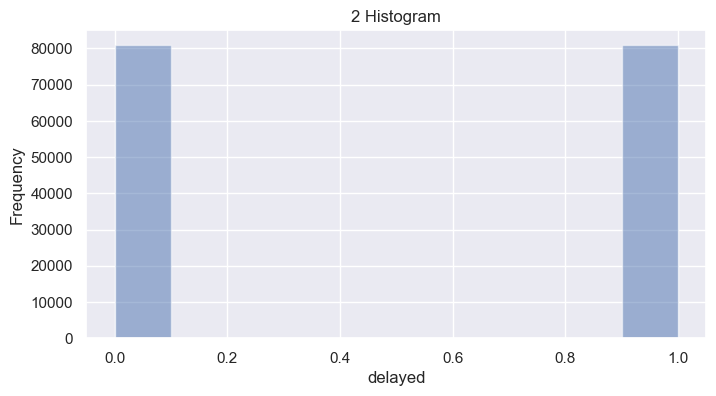

In [56]:
balanced_df['delayed'].plot.hist(alpha=0.5, bins=10, figsize=(8, 4), title=f"{i} Histogram")
plt.xlabel("delayed")
plt.ylabel("Frequency")
plt.show()

In [57]:
balanced_df.shape

(161912, 14)

# Model Creation

In [73]:
balanced_df

,Month,DayofMonth,DayOfWeek,DepTime,Distance,CombinedDate,Dep_Dist,DDC,DCD,sin_Month,sin_DayofMonth,sin_DayOfWeek,cos_DayOfWeek,delayed,cos_CombinedDate,sin_CombinedDate,UniqueCarrier_hash
0,0.103904,0.221732,0.229128,0.950532,-1.057756,0.146931,-0.452581,-0.451333,-0.032001,-0.128027,-0.000458,0.041605,0.220397,0,-0.190809,0.981627,3.806407e+18
1,-1.429631,0.532466,0.968127,-1.121164,1.379468,-1.371449,0.650481,1.356191,-0.199974,-1.351389,0.440435,1.027814,-1.008752,1,0.5,0.866025,7.165092e+17
2,-0.505082,0.665188,0.629563,0.708713,0.252395,-0.410862,0.583051,0.714343,-0.170282,-0.729006,0.649013,0.539029,-0.332643,1,-0.999391,-0.034899,-7.096575e+18
3,1.079440,-0.178873,0.968127,0.200206,-1.336929,1.017990,-1.079970,-1.481087,0.741347,1.285097,-0.474409,1.027814,-1.008752,0,0.707107,0.707107,-6.131454e+18
4,1.079440,0.719616,-0.892806,1.136538,-0.508827,1.032348,0.127248,-0.530167,-0.127406,1.285097,0.738178,-0.979727,0.957586,1,0.292372,-0.956305,5.637690e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161907,1.079440,0.461039,0.629563,-0.922372,0.968070,1.027244,0.388274,-0.319282,-0.015381,1.285097,0.333216,0.539029,-0.332643,0,<NA>,<NA>,NaN
161908,-0.908952,0.035786,-1.783336,-0.121007,0.563396,-0.846802,0.437232,0.864888,-0.230143,-1.037478,-0.233189,-1.503931,1.141849,1,<NA>,<NA>,NaN
161909,-2.163487,0.665188,0.629563,1.105762,0.602133,-2.240942,1.092927,2.242747,-0.229178,-1.670830,0.649013,0.539029,-0.332643,0,<NA>,<NA>,NaN
161910,0.921957,0.950370,0.229128,-0.908928,-0.411824,0.900725,-0.823383,-1.205947,0.243448,1.012373,1.137353,0.041605,0.220397,1,<NA>,<NA>,NaN


In [75]:

# Create a DataFrame to organize the results
feature_rankings = [
    'DepTime: 0.3137',
    'CombinedDate: 0.0596',
    'Dep_Dist: 0.0577',
    'cos_CombinedDate: 0.0528',
    'sin_CombinedDate: 0.0527',
    'UniqueCarrier_hash: 0.0504',
    'DayOfWeek: 0.0504',
    'Distance: 0.0494',
    'Origin_hash: 0.0485',
    'Dest_hash: 0.0415',
    'DayofMonth: 0.0387',
    'sin_DepTime: 0.0373',
    'cos_DepTime: 0.0346',
    'DCD: 0.0314',
    'DDC: 0.0310',
    'Dist_Fact: 0.0280',
    'Month: 0.0222',
    'sin_DayOfWeek: 0.0000',
    'cos_DayOfWeek: 0.0000',
    'sin_DayofMonth: 0.0000',
    'sin_Month: 0.0000'
]
# Split feature names and rankings
feature_names = [entry.split(':')[0] for entry in feature_rankings]
feature_values = [float(entry.split(':')[1]) for entry in feature_rankings]

# Create the DataFrame
fr = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_values})


# Create a DataFrame to store the results
feature_importance_df = pd.DataFrame({'Feature': importance_df['Feature'], 'Importance': importance_df['Importance']})

# Set your desired threshold (e.g., 0.05)
threshold = 0.05

# Filter features based on importance threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
balanced_df['cos_CombinedDate']=X['cos_CombinedDate']
balanced_df['sin_CombinedDate']=X['sin_CombinedDate']
balanced_df['UniqueCarrier_hash']=X['UniqueCarrier_hash']

# Assuming 'balanced_df' and 'df' are your DataFrames
# Convert specific columns to numeric (excluding string columns)
numeric_columns = balanced_df.select_dtypes(include=['number']).columns
balanced_df[numeric_columns] = balanced_df[numeric_columns].fillna(balanced_df[numeric_columns].median())


X_selected = balanced_df[selected_features]



(161912, 17)

In [77]:
# Logistic Regression Model
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


ValueError: Found input variables with inconsistent numbers of samples: [161912, 100000]

In [ ]:
# Gridsearch cv for SVM model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Create an SVM model
svm_model = SVC()

# Perform grid search with F1-score as the scoring metric
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1-score:", best_score)


In [78]:
# SVM Model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset 
X=X_selected
y=balanced_df['delayed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with specified hyperparameters
svm_model = SVC(C=1, gamma=0.1, kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


Precision: 0.6477026518255807
Recall: 0.6341290183120774
F1-score: 0.6251591638501146
AUC-ROC: 0.6336859435012275


Base Model perfomance

Linear Regression
Precision: 0.6372532422746764
Recall: 0.6346231047154371
F1-score: 0.6329947414337121
AUC-ROC: 0.6347739790773187


SVM
Precision: 0.6554243105811502
Recall: 0.6497853812185406
F1-score: 0.646712598456466
AUC-ROC: 0.6499616144478134